In [1]:
#Import
import pandas as pd
import numpy as np
import operator

#Train et test
from sklearn.model_selection import train_test_split

In [2]:
path_jeu1_complet_net = "C:/Users/thoma/Desktop/Formation SID/M1 SID/projet inter-promo/Données/PIP_2022NA/DATA1/DONNEES_NETTOYEES/"
df_jeu1_complet_net = pd.read_csv(path_jeu1_complet_net + 'Donnees_v1.csv')

In [64]:
df_jeu1_complet_net['TAUX_LECTURE_MS_6M'] = df_jeu1_complet_net['TAUX_LECTURE_MS_6M'].str.rstrip('%').astype('float') / 100.0
df_jeu1_complet_net['TAUX_LECTURE_PAP_6M'] = df_jeu1_complet_net['TAUX_LECTURE_PAP_6M'].str.rstrip('%').astype('float') / 100.0
df_jeu1_complet_net['TAUX_LECTURE_EMAIL_6M'] = df_jeu1_complet_net['TAUX_LECTURE_EMAIL_6M'].str.rstrip('%').astype('float') / 100.0
df_jeu1_complet_net['TAUX_LECTURE_EMAIL_6M']

0         0.00
1         0.57
2         0.00
3         0.50
4         0.29
          ... 
849407    0.00
849408    1.00
849409    0.50
849410    0.00
849411    0.00
Name: TAUX_LECTURE_EMAIL_6M, Length: 849412, dtype: float64

In [65]:
ech_test = df_jeu1_complet_net.sample(int(len(df_jeu1_complet_net) * 0.10), random_state=1)
ech_train = df_jeu1_complet_net.drop(ech_test.index)

## Echantillon de données pour tester les algos

In [58]:
colname = ech_test.columns
#print(colname)
new_df = ech_test.iloc[:][colname[5:50]] # on ne prend pas en compte les variables Unnamed et ID qui sont des variables qualitatives
new_df

new_df_target = ech_test.iloc[:][colname[2]] #on récupère top_fraude

# On retire les variables liées à TOP_FRAUDE car l'objectif est de déterminer si les regroupements observés sur l'ACP
# permettent de différencier les fraudés des non fraudés.

## Analyse en Composantes Principales

In [66]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler

### Projection des données sur le premier axe principal

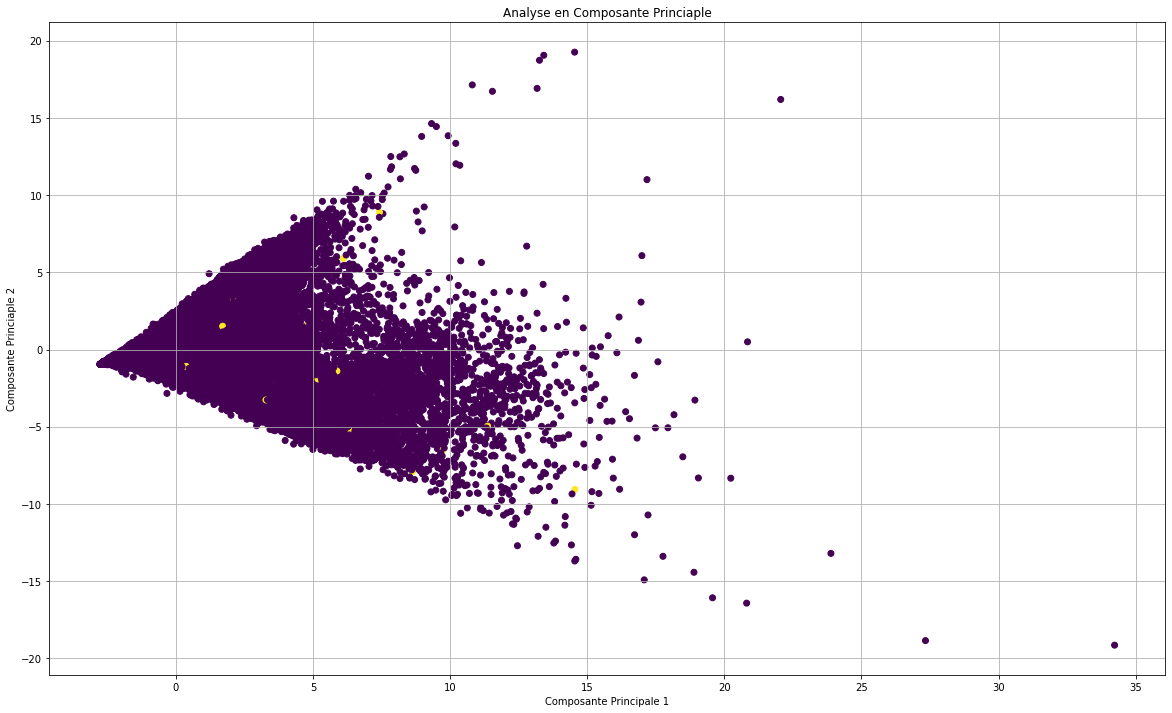

In [84]:
X = new_df # Caractéristiques des individus
y = new_df_target # Variable cible "TOP_FRAUDE"

scaler = StandardScaler() # 
scaler.fit(X) # 
X = scaler.transform(X) # 

pca = PCA() # définition du modèle
pca.fit(X,y) # Ajuste le modèle
x_new = pca.transform(X) # Applique la réduction de dimension sur X

def myplot(val,coeff,labels = None):
    xs = val[:,0]
    ys = val[:,1]
    
    n = coeff.shape[0]
    plt.scatter(xs ,ys, c = y, alpha = 1.1) #without scaling
    
    #for i in range(n):
    #    plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
    #    if labels is None:
    #        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
    #    else:
    #        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

            
# Affichage graphique    
plt.rcParams["figure.figsize"] = (20,12)
plt.title("Analyse en Composante Princiaple")    
plt.xlabel("Composante Principale {}".format(1))
plt.ylabel("Composante Princiaple {}".format(2))
plt.grid()

myplot(x_new[:,0:2], pca.components_) 
plt.show()

### Cercle des corrélations

## T-SNE

In [68]:
from sklearn.manifold import TSNE
#from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  

In [69]:
X = new_df # Caractéristiques des individus
y = new_df_target # Variable cible "TOP_FRAUDE"

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 84941 samples in 8.413s...
[t-SNE] Computed neighbors for 84941 samples in 149.884s...
[t-SNE] Computed conditional probabilities for sample 1000 / 84941
[t-SNE] Computed conditional probabilities for sample 2000 / 84941
[t-SNE] Computed conditional probabilities for sample 3000 / 84941
[t-SNE] Computed conditional probabilities for sample 4000 / 84941
[t-SNE] Computed conditional probabilities for sample 5000 / 84941
[t-SNE] Computed conditional probabilities for sample 6000 / 84941
[t-SNE] Computed conditional probabilities for sample 7000 / 84941
[t-SNE] Computed conditional probabilities for sample 8000 / 84941
[t-SNE] Computed conditional probabilities for sample 9000 / 84941
[t-SNE] Computed conditional probabilities for sample 10000 / 84941
[t-SNE] Computed conditional probabilities for sample 11000 / 84941
[t-SNE] Computed conditional probabilities for sample 12000 / 84941
[t-SNE] Computed conditional probabilities for s

[Text(0.5, 1.0, 'data T-SNE projection')]

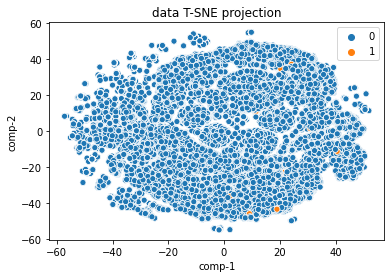

In [70]:
tsne = TSNE(n_components = 2, verbose = 1, random_state = 123)
z = tsne.fit_transform(X) 
 
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x = "comp-1", y = "comp-2", hue = df.y.tolist(), data = df).set(title = "data T-SNE projection") 

## Analyse Discriminante Linéaire (LDA)

In [86]:
lda = LinearDiscriminantAnalysis(n_components = 2)

new_df_LDA = lda.fit(new_df, new_df_target).transform(new_df)

print("Rappel des composantes identifiées par le PCA :")
graph_acp2(new_df_LDA, new_df_target)

print("Composantes identifiées par le LDA (on remarque une meilleure séparation des classes sur la 1ère composante) :")
graph_acp2(new_df_LDA, new_df_target)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

## Locally Linear Embedding (LLE)